# By - Ankit Kumar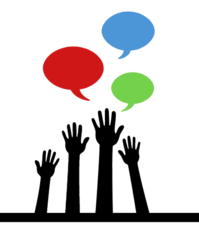

# Prediction using Decision Tree Algorithm


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [9]:
df.isnull().any().any()

False

In [10]:
df.columns
list(df.columns)
cols = list(df.columns)
cols

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [11]:
range = df["SepalLengthCm"].max() - df["SepalLengthCm"].min()
range

3.6000000000000005

In [12]:
df["SepalLengthCm"] = (df["SepalLengthCm"] - df["SepalLengthCm"].min())/range
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,3.5,1.4,0.2,Iris-setosa
1,2,0.166667,3.0,1.4,0.2,Iris-setosa
2,3,0.111111,3.2,1.3,0.2,Iris-setosa
3,4,0.083333,3.1,1.5,0.2,Iris-setosa
4,5,0.194444,3.6,1.4,0.2,Iris-setosa


In [13]:
group_names = df['Species'].unique().tolist()
group_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

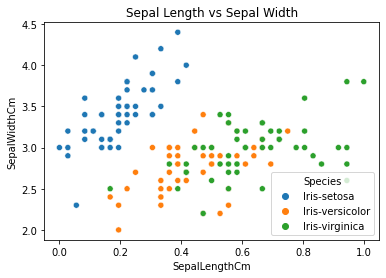

In [14]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df, hue = 'Species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [15]:
df['SepalLengthCm'].corr(df['SepalWidthCm'])

-0.10936924995064934

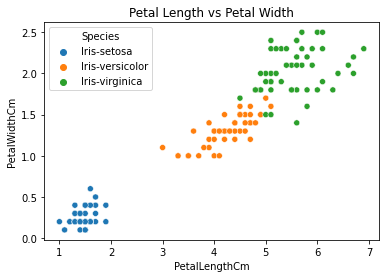

In [16]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df ,hue ='Species')
plt.title('Petal Length vs Petal Width')
plt.show()

In [17]:
df['PetalLengthCm'].corr(df['PetalWidthCm'])

0.9627570970509663

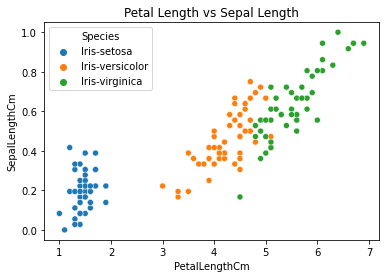

In [18]:
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data = df ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

In [19]:
df['PetalLengthCm'].corr(df['SepalLengthCm'])

0.8717541573048715

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

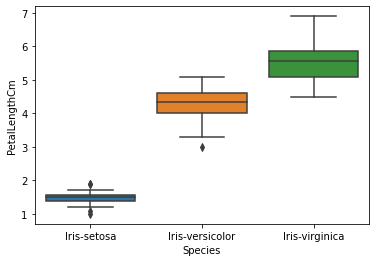

In [20]:
sns.boxplot(x = "Species", y = "PetalLengthCm", data = df)

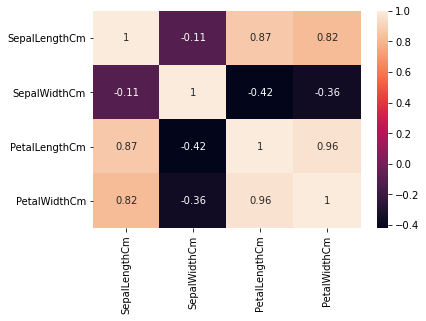

In [21]:
no_id_df = df.copy()
no_id_df.drop("Id", axis = 1, inplace = True)
sns.heatmap(data = no_id_df.corr(), annot = True)
plt.show()

In [22]:
x_values = df['PetalLengthCm'].copy()
y_values = df['PetalWidthCm'].copy()

In [23]:
x_train, x_test, y_train1, y_test1 = train_test_split(x_values, y_values, test_size = 0.33, random_state = 3)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
species_dummy = pd.get_dummies(df["Species"])
species_dummy.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
assigned_data = df.copy()


In [27]:
assigned_data = pd.concat([df, species_dummy], axis = 1)
assigned_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0.222222,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,0.166667,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,0.111111,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,0.083333,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,0.194444,3.6,1.4,0.2,Iris-setosa,1,0,0


In [28]:
assigned_data.drop(["Id"], inplace = True, axis = 1)
assigned_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.222222,3.5,1.4,0.2,Iris-setosa,1,0,0
1,0.166667,3.0,1.4,0.2,Iris-setosa,1,0,0
2,0.111111,3.2,1.3,0.2,Iris-setosa,1,0,0
3,0.083333,3.1,1.5,0.2,Iris-setosa,1,0,0
4,0.194444,3.6,1.4,0.2,Iris-setosa,1,0,0


In [29]:
target = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
features = cols[1:4]
print(target)
print(features)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']


In [30]:
y = assigned_data[target].copy()


In [31]:
X= assigned_data[features].copy()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [33]:
print(X_train.describe())
X_train.head()

       SepalLengthCm  SepalWidthCm  PetalLengthCm
count     135.000000    135.000000     135.000000
mean        0.436008      3.055556       3.814815
std         0.226388      0.428581       1.746960
min         0.000000      2.000000       1.000000
25%         0.222222      2.800000       1.600000
50%         0.416667      3.000000       4.500000
75%         0.583333      3.300000       5.100000
max         1.000000      4.200000       6.700000


,SepalLengthCm,SepalWidthCm,PetalLengthCm
40,0.194444,3.5,1.3
72,0.555556,2.5,4.9
135,0.944444,3.0,6.1
113,0.388889,2.5,5.0
42,0.027778,3.2,1.3


In [34]:
y_train.head(10)

,Iris-setosa,Iris-versicolor,Iris-virginica
40,1,0,0
72,0,1,0
135,0,0,1
113,0,0,1
42,1,0,0
126,0,0,1
112,0,0,1
141,0,0,1
76,0,1,0
5,1,0,0


In [35]:
iris_classifier = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)
iris_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [36]:
y_prediction = iris_classifier.predict(X_test)

In [37]:
y_prediction

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [38]:
y_test[0:10]

,Iris-setosa,Iris-versicolor,Iris-virginica
47,1,0,0
3,1,0,0
31,1,0,0
25,1,0,0
15,1,0,0
118,0,0,1
89,0,1,0
6,1,0,0
103,0,0,1
65,0,1,0


In [39]:
accuracy_score(y_true = y_test, y_pred = y_prediction)

1.0

Conclusion

I want to know the reason for this 100% accuracy. Is it because these are highly correlated variables?

Things to note:-

If I decrease the size of the training set, I can reduce the accuracy which is obvious but still mentioning. Is it a bad practice to take 0.1 as the test size?
Even if I do not scale the values, I can get a 100% result. The scaling was for my own knowledge.

# Thanks 